<a href="https://www.kaggle.com/code/uwu1234/discrete-choice-model-in-python?scriptVersionId=205268101" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

## Discrete Choice Model for Siimulated Data

Optimization terminated successfully.
         Current function value: 0.445902
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                  800
Model:                          Logit   Df Residuals:                      797
Method:                           MLE   Df Model:                            2
Date:                Mon, 04 Nov 2024   Pseudo R-squ.:                  0.3561
Time:                        23:08:27   Log-Likelihood:                -356.72
converged:                       True   LL-Null:                       -554.03
Covariance Type:            nonrobust   LLR p-value:                 2.047e-86
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0693      0.093     -0.746      0.455      -0.251       0.113
x1             0.9939      0.

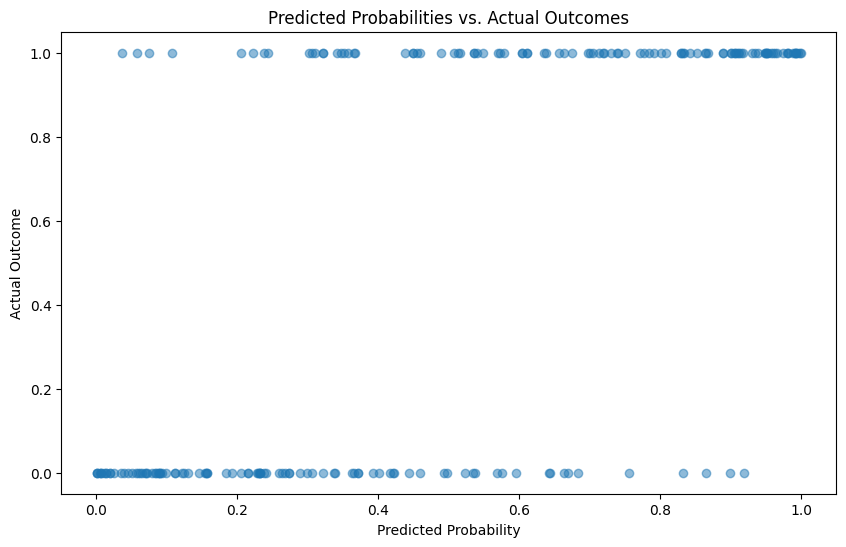

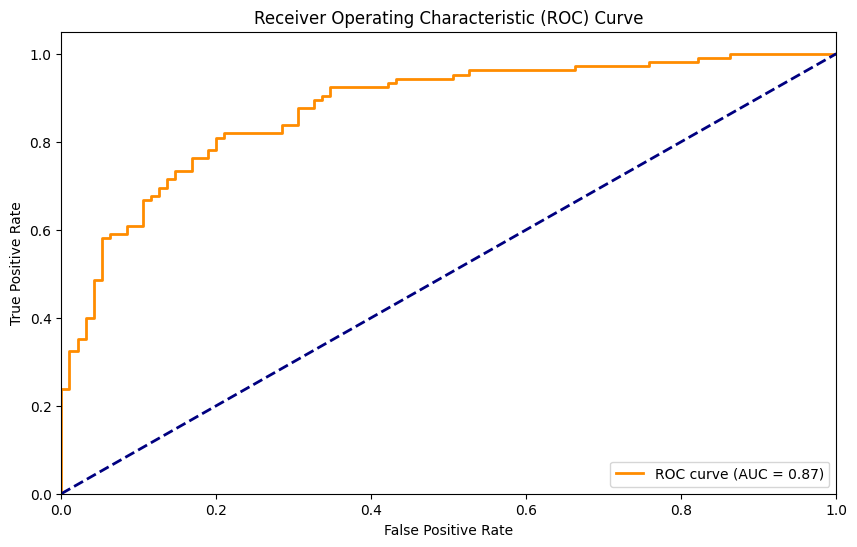

In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import statsmodels.api as sm
from statsmodels.discrete.discrete_model import Logit
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Generate sample data
np.random.seed(42)
n_samples = 1000

X1 = np.random.randn(n_samples)
X2 = np.random.randn(n_samples)
X = np.column_stack((X1, X2))
beta = np.array([1, 2])
y = (np.dot(X, beta) + np.random.logistic(size=n_samples)) > 0
y = y.astype(int)

# Create a DataFrame
df = pd.DataFrame({'X1': X1, 'X2': X2, 'y': y})

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Add a constant term to the independent variables
X_train = sm.add_constant(X_train)
X_test = sm.add_constant(X_test)

# Fit the logit model
model = Logit(y_train, X_train)
results = model.fit()

# Print the summary of the model
print(results.summary())

# Make predictions on the test set
y_pred = results.predict(X_test)

# Calculate accuracy
accuracy = np.mean((y_pred > 0.5) == y_test)
print(f"Accuracy: {accuracy:.4f}")

# Plot the predicted probabilities vs. actual outcomes
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, y_test, alpha=0.5)
plt.xlabel("Predicted Probability")
plt.ylabel("Actual Outcome")
plt.title("Predicted Probabilities vs. Actual Outcomes")
plt.show()

# Plot the ROC curve
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()